# Problem 39

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import statistics
import scipy.stats as st
from scipy.stats import median_test
import statistics, math
from scipy.stats import mannwhitneyu

## Part A

In [1]:
data = [[676, 88],
[206, 570],
[230, 605],
[256, 617],
[280, 653],
[433, 2913],
[337, 924],
[466, 286],
[497, 1098],
[512, 982],
[794, 2346],
[428, 321],
[452, 615],
[512, 519]]

In [35]:

test = [None]*len(data)
for i in range(len(data)):
    test[i] = data[i][0]
control = [None]*len(data)
for i in range(len(data)):
    control[i] = data[i][1]

[676, 206, 230, 256, 280, 433, 337, 466, 497, 512, 794, 428, 452, 512]
[88, 570, 605, 617, 653, 2913, 924, 286, 1098, 982, 2346, 321, 615, 519]


In [45]:
df = pd.DataFrame({'test':test,'control':control})
df['difference'] = df['test'] - df['control']
df

,test,control,difference
0,676,88,588
1,206,570,-364
2,230,605,-375
3,256,617,-361
4,280,653,-373
5,433,2913,-2480
6,337,924,-587
7,466,286,180
8,497,1098,-601
9,512,982,-470


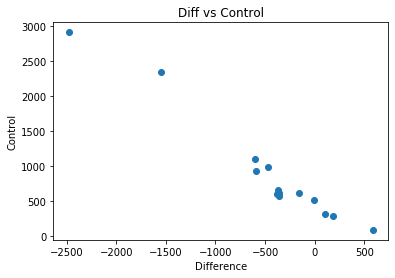

In [48]:
plt.scatter(x= df.loc[:, 'difference'], y= df.loc[:, 'control'])
plt.xlabel('Difference')
plt.ylabel('Control')
plt.title('Diff vs Control')
plt.show()

### We see a negative slope and a linear relation between the difference and the control

## Part B

In [77]:
diff=statistics.mean(test)-statistics.mean(control)
print(f'The mean difference is: {diff}')

The mean difference is: -461.2857142857143


In [91]:
print(f"Test Standard Deviation: {df.test.std()}")
print(f"Control Standard Deviation: {df.control.std()}")
print(f"Difference Standard Deviation: {df.difference.std()}")

Test Standard Deviation: 167.35369204698844
Control Standard Deviation: 790.5351400743092
Difference Standard Deviation: 757.8092340192452


In [98]:
conf=st.t.interval(alpha=0.95, df=len(df.difference)-1, loc=np.mean(df.difference), scale=st.sem(df.difference))
print(f"Confidence Interval: {conf}")

Confidence Interval: (-898.8317393544219, -23.739689217006685)


## Part C

In [99]:
diff_med=statistics.median(test)-statistics.median(control)
print(f'The median of Test is: {statistics.median(test)}')
print(f'The median of Control is: {statistics.median(control)}')
print(f'The median difference is: {diff_med}')

The median of Test is: 442.5
The median of Control is: 616.0
The median difference is: -173.5


In [90]:
size=len(df.difference)
med_conf = (df.difference.median() + df.difference.std()/ (size)**(1/2),
 df.difference.median() - df.difference.std()/ (size)**(1/2))

print(f'The median confidence interval is {med_conf}')


The median confidence interval is (-165.9669629833135, -571.0330370166865)


In [125]:
from __future__ import division, print_function
import numpy as np, scipy.stats as st

# example data set
def med_ci(data,alpha):
    a = np.array(data)
    w = a + 1
    # create custom discrete random variable from data set
    rv = st.rv_discrete(values=(a, w/w.sum()))
    # scipy.stats.rv_discrete has methods for median, confidence interval, etc.
    print(rv.interval(alpha))
    
print('Test Medium CI')    
med_ci(test,.95)
print('Control Medium CI')    
med_ci(control,.95)




Test Medium CI
(206.0, 794.0)
Control Medium CI
(286.0, 2913.0)


### We can see that the mean and the median value are very different for test and control and there difference

## Part D

### It is appropriate to conduct a non-parametric test as the normal test failed for this data set. That is a base assumption for a t-test.

In [128]:
st.ttest_ind(test, control)

Ttest_indResult(statistic=-2.135959629636021, pvalue=0.04226646799521951)

In [136]:
mannwhitneyu(test, control)

MannwhitneyuResult(statistic=46.0, pvalue=0.008975449241808228)